In [82]:
import pandas as pd

# 1. Data Example

In [87]:
df = data = pd.read_csv("/content/EEG_HMC.csv")

In [88]:
df.head(10)
df.shape

(43191, 76)

# 2. Split feature vectors and labels

In [89]:
# X is feature vectors
X = df.iloc[:,1:76]

In [90]:
X.head(9)

,MeanP_Alpha_F4,MedianF_Alpha_F4,MeanF_Alpha_F4,Spectral Edge_Alpha_F4,PeakF_Alpha_F4,MeanP_Beta_F4,MedianF_Beta_F4,MeanF_Beta_F4,Spectral Edge_Beta_F4,PeakF_Beta_F4,MeanP_Theta_F4,MedianF_Theta_F4,MeanF_Theta_F4,Spectral Edge_Theta_F4,PeakF_Theta_F4,MeanP_Delta_F4,MedianF_Delta_F4,MeanF_Delta_F4,Spectral Edge_Delta_F4,PeakF_Delta_F4,MeanP_Gamma_F4,MedianF_Gamma_F4,MeanF_Gamma_F4,Spectral Edge_Gamma_F4,PeakF_Gamma_F4,MeanP_Alpha_C4,MedianF_Alpha_C4,MeanF_Alpha_C4,Spectral Edge_Alpha_C4,PeakF_Alpha_C4,MeanP_Beta_C4,MedianF_Beta_C4,MeanF_Beta_C4,Spectral Edge_Beta_C4,PeakF_Beta_C4,MeanP_Theta_C4,MedianF_Theta_C4,MeanF_Theta_C4,Spectral Edge_Theta_C4,PeakF_Theta_C4,MeanP_Delta_C4,MedianF_Delta_C4,MeanF_Delta_C4,Spectral Edge_Delta_C4,PeakF_Delta_C4,MeanP_Gamma_C4,MedianF_Gamma_C4,MeanF_Gamma_C4,Spectral Edge_Gamma_C4,PeakF_Gamma_C4,MeanP_Alpha_O2,MedianF_Alpha_O2,MeanF_Alpha_O2,Spectral Edge_Alpha_O2,PeakF_Alpha_O2,MeanP_Beta_O2,MedianF_Beta_O2,MeanF_Beta_O2,Spectral Edge_Beta_O2,PeakF_Beta_O2,MeanP_Theta_O2,MedianF_Theta_O2,MeanF_Theta_O2,Spectral Edge_Theta_O2,PeakF_Theta_O2,MeanP_Delta_O2,MedianF_Delta_O2,MeanF_Delta_O2,Spectral Edge_Delta_O2,PeakF_Delta_O2,MeanP_Gamma_O2,MedianF_Gamma_O2,MeanF_Gamma_O2,Spectral Edge_Gamma_O2,PeakF_Gamma_O2
0,0,9,18,17,8,0,20,30,34,16,0,4,10,8,3,0,1,5,3,1,0,36,43,50,50,0,10,19,18,10,0,20,29,33,17,0,5,12,10,4,0,1,5,3,1,0,35,42,50,50,0,11,21,20,10,0,21,30,34,21,0,4,13,11,2,0,1,4,2,1,0,35,42,50,50
1,0,10,17,17,11,0,17,26,29,20,0,4,12,10,3,0,1,4,3,1,0,35,47,50,50,0,10,18,17,10,0,17,26,28,17,0,6,13,11,4,0,1,6,3,1,0,31,41,50,50,0,11,18,18,11,0,18,27,31,19,0,6,14,11,3,0,0,4,1,0,0,34,43,50,50
2,0,10,18,17,9,0,18,25,28,19,0,5,12,9,3,0,1,4,2,1,0,34,49,50,50,0,10,18,18,9,0,18,25,27,14,0,6,13,10,3,0,1,6,3,0,0,30,41,50,50,0,11,18,18,11,0,18,25,28,21,0,6,13,11,5,0,1,5,2,1,0,35,46,50,50
3,0,10,18,17,10,0,17,26,29,16,0,6,13,10,2,0,1,6,3,1,0,33,46,50,50,0,10,18,18,10,0,19,26,28,16,0,6,13,10,6,0,1,6,3,1,0,28,39,50,50,0,10,18,18,10,0,18,27,29,16,0,6,13,11,4,0,1,7,3,1,0,32,44,50,50
4,0,10,18,17,8,0,17,26,28,18,0,5,12,9,3,0,1,5,3,0,0,34,50,50,50,0,10,18,17,10,0,17,26,28,18,0,6,13,10,6,0,1,6,3,1,0,30,40,50,50,0,10,18,18,10,0,18,26,29,20,0,6,13,11,3,0,0,6,2,0,0,34,45,50,50
5,0,10,17,16,10,0,16,25,27,14,0,6,13,11,5,0,0,7,3,0,0,33,50,50,50,0,10,17,17,10,0,17,26,27,14,0,6,13,11,6,0,1,7,4,1,0,28,39,50,50,0,10,17,17,10,0,17,25,27,21,0,7,13,11,5,0,1,8,3,1,0,33,46,50,50
6,0,10,18,17,10,0,18,25,27,14,0,6,13,11,6,0,1,7,3,1,0,33,48,50,50,0,10,18,18,6,0,19,26,27,23,0,6,12,10,6,0,1,7,3,1,0,27,37,50,50,0,11,18,18,11,0,18,26,28,18,0,6,13,11,6,0,1,6,3,1,0,33,44,50,50
7,0,11,18,17,9,0,17,25,27,17,0,6,13,11,4,0,1,7,3,1,0,32,47,50,50,0,10,20,19,6,0,19,26,27,20,0,6,13,10,5,0,1,7,4,1,0,27,35,48,50,0,10,18,17,10,0,18,26,29,13,0,6,13,11,6,0,1,7,4,1,0,32,44,50,50
8,0,9,18,17,9,0,17,26,28,15,0,5,11,10,5,0,1,7,4,0,0,33,48,50,50,0,9,17,17,6,0,17,26,28,15,0,5,11,9,6,0,2,6,4,1,0,29,39,50,50,0,10,17,17,10,0,17,26,29,17,0,5,12,10,6,0,1,6,4,1,0,33,44,50,50


In [64]:
Y = df[['Sleep_Stage']]

In [65]:
Y.head(10)

,Sleep_Stage
0,W
1,W
2,W
3,W
4,W
5,W
6,N1
7,N1
8,N1
9,N2


# 3. rescaling feature vectors to all have the same scale

In [66]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(X)

In [67]:
x_std

array([[-0.02205559,  0.01652366,  0.53637523, ..., -0.2743898 ,
        -0.06933917,  0.40624889],
       [-0.02205559,  0.42387152,  0.31715249, ..., -0.19137574,
        -0.06933917,  0.40624889],
       [-0.02205559,  0.42387152,  0.53637523, ...,  0.05766643,
        -0.06933917,  0.40624889],
       ...,
       [-0.02205559, -0.3908242 , -0.77896123, ..., -0.93850225,
        -1.20647172, -1.79839814],
       [-0.02205559, -0.3908242 , -0.77896123, ..., -0.85548819,
        -0.92218859, -2.10459912],
       [-0.02205559, -0.3908242 , -0.77896123, ..., -0.77247413,
        -0.82742754, -1.79839814]])

# 4. Covariance Matrix of features

In [68]:
import numpy as np

In [69]:
# features are columns from x_std
features = x_std.T 
covariance_matrix = np.cov(features)
print(covariance_matrix)

[[ 1.00002315 -0.00904789 -0.00612896 ... -0.01032422 -0.00690379
  -0.00711973]
 [-0.00904789  1.00002315  0.64191599 ... -0.4030281  -0.42214109
  -0.30166729]
 [-0.00612896  0.64191599  1.00002315 ... -0.31431813 -0.36003618
  -0.20625686]
 ...
 [-0.01032422 -0.4030281  -0.31431813 ...  1.00002315  0.92819022
   0.79899824]
 [-0.00690379 -0.42214109 -0.36003618 ...  0.92819022  1.00002315
   0.72180487]
 [-0.00711973 -0.30166729 -0.20625686 ...  0.79899824  0.72180487
   1.00002315]]


# 5. Eigen Vectors and Eigen Values from Covariance Matrix

In [70]:
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)

In [71]:
print('Eigenvectors \n%s' %eig_vecs)

Eigenvectors 
[[-1.29237326e-03 -8.44253704e-02  2.99390540e-01 ... -1.35127273e-03
   2.75979758e-17 -2.71636713e-16]
 [-6.90305662e-02  1.85140538e-01  4.22000481e-02 ...  2.44813010e-03
   7.37336268e-17 -9.26046048e-16]
 [-5.36245993e-02  2.68347686e-01  7.98378765e-02 ...  8.34272471e-02
   2.71453136e-16  1.17057643e-15]
 ...
 [ 1.49343650e-01  9.81710468e-03  4.75156542e-03 ... -5.32139696e-02
  -1.79262650e-16  1.24662770e-15]
 [ 1.52915940e-01 -2.82978738e-02 -7.67674301e-03 ...  8.49657881e-02
  -2.22419058e-17 -3.21612329e-16]
 [ 1.16743342e-01  2.82079456e-02  1.67042567e-02 ... -1.24621474e-02
  -8.65234527e-17  9.97601453e-17]]


In [72]:
print('\nEigenvalues \n%s' %eig_vals)


Eigenvalues 
[ 3.94291963e+01  7.51477403e+00  6.84930011e+00  2.61214329e+00
  2.42416319e+00  2.02101194e+00  1.85995456e+00  1.73107722e+00
  1.27146469e+00  1.12207204e+00  9.20085138e-01  7.77208044e-01
  7.46209807e-01  6.53031978e-01  5.00609906e-01  4.19589030e-01
  4.12981871e-01  3.61960092e-01  3.25856432e-01  3.11452491e-01
  2.94541042e-01  2.38488004e-01  2.14333562e-01  1.98728166e-01
  1.75294555e-01  1.27338600e-01  1.11024483e-01  9.68298717e-02
  9.03002185e-02  8.22641673e-02  7.40372628e-02  6.86347389e-02
  6.33863382e-02  6.16635605e-02  5.51057778e-02  5.16162649e-02
  4.97363796e-02  4.65924199e-02  4.18722725e-02  3.92152587e-02
  3.74796831e-02  3.52042949e-02  3.45947455e-02  3.22918464e-02
  2.93377813e-02  2.54047559e-02  2.50422936e-02  2.33052470e-02
  3.29799891e-03  3.60358703e-03  4.39650816e-03  2.17707495e-02
  2.08354495e-02  1.98363733e-02  1.94706917e-02  1.75241952e-02
  7.58370546e-03  8.30739693e-03  8.47315906e-03  9.30799312e-03
  1.6116872

In [73]:
# We reduce dimension to 1 dimension, since 1 eigenvector has 73% (enough) variances
eig_vals[0] / sum(eig_vals)

0.5257104454891712

# 6. Project data point onto selected Eigen Vector

In [74]:
projected_X = x_std.dot(eig_vecs.T[0])

In [75]:
projected_X

array([-0.87402512, -1.05363089, -1.02102954, ..., -3.45118269,
       -3.32798864, -2.69649168])

In [76]:
result = pd.DataFrame(projected_X, columns=['PC1'])
result['y-axis'] = 0.0
result['label'] = Y

In [77]:
result.head(10)

,PC1,y-axis,label
0,-0.874025,0.0,W
1,-1.053631,0.0,W
2,-1.021030,0.0,W
3,-0.780941,0.0,W
4,-0.931614,0.0,W
5,-0.554101,0.0,W
6,-0.650535,0.0,N1
7,-0.696979,0.0,N1
8,-0.708931,0.0,N1
9,-1.055504,0.0,N2


In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'PCA result')

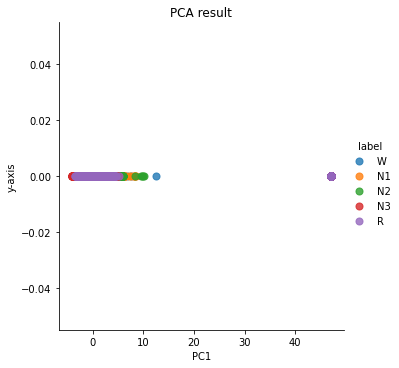

In [79]:
sns.lmplot('PC1', 'y-axis', data=result, fit_reg=False,  # x-axis, y-axis, data, no line
           scatter_kws={"s": 50}, # marker size
           hue="label") # color
           
plt.title('PCA result')

# bonus - scikit-learn PCA

In [80]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=1)
sklearn_pca_x = pca.fit_transform(x_std)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


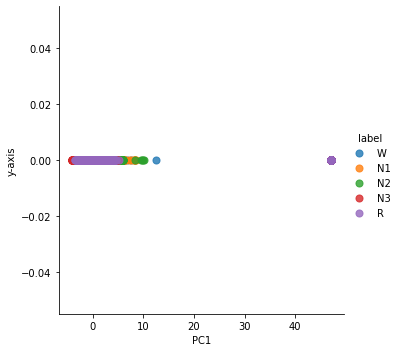

In [81]:
sklearn_result = pd.DataFrame(sklearn_pca_x, columns=['PC1'])
sklearn_result['y-axis'] = 0.0
sklearn_result['label'] = Y

sns.lmplot('PC1', 'y-axis', data=sklearn_result, fit_reg=False,  # x-axis, y-axis, data, no line
           scatter_kws={"s": 50}, # marker size
           hue="label") # color